In [5]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [23]:
from matplotlib import pyplot as plt
import numpy as np
import os 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report, confusion_matrix
import seaborn as sns
import xgboost as xgb


os.getcwd()








'C:\\Users\\nixty\\Downloads'

In [20]:
pubg_data = pd.read_csv('data.csv')

# Drop rows with missing target values
pubg_data.dropna(subset=['winPlacePerc'], inplace=True)

# Drop unnecessary columns
pubg_data = pubg_data.drop(['Id', 'groupId', 'matchId', 'matchType'], axis=1)

# Create total distance feature
pubg_data['totalDistance'] = pubg_data['rideDistance'] + pubg_data['walkDistance'] + pubg_data['swimDistance']

# Define potential cheaters based on heuristic rules
pubg_data['potential_cheaters'] = ((pubg_data['kills'] > 0) & (pubg_data['totalDistance'] == 0)) | \
                                   (pubg_data['kills'] > 59) | \
                                   (pubg_data['longestKill'] >= 1000) | \
                                   (pubg_data['weaponsAcquired'] >= 50) | \
                                   ((pubg_data['weaponsAcquired'] == 0) & (pubg_data['kills'] > 10)) | \
                                   (pubg_data['heals'] >= 30)

#### Training the dataset with XGBoost

XGBoost - Test Data Accuracy:  0.9999537405280519
XGBoost - Precision Score:  0.9672131147540983
XGBoost - Recall Score:  0.9494252873563218
XGBoost - F1 Score:  0.9582366589327146
XGBoost - Area Under Curve (AUC):  0.9747036437501604


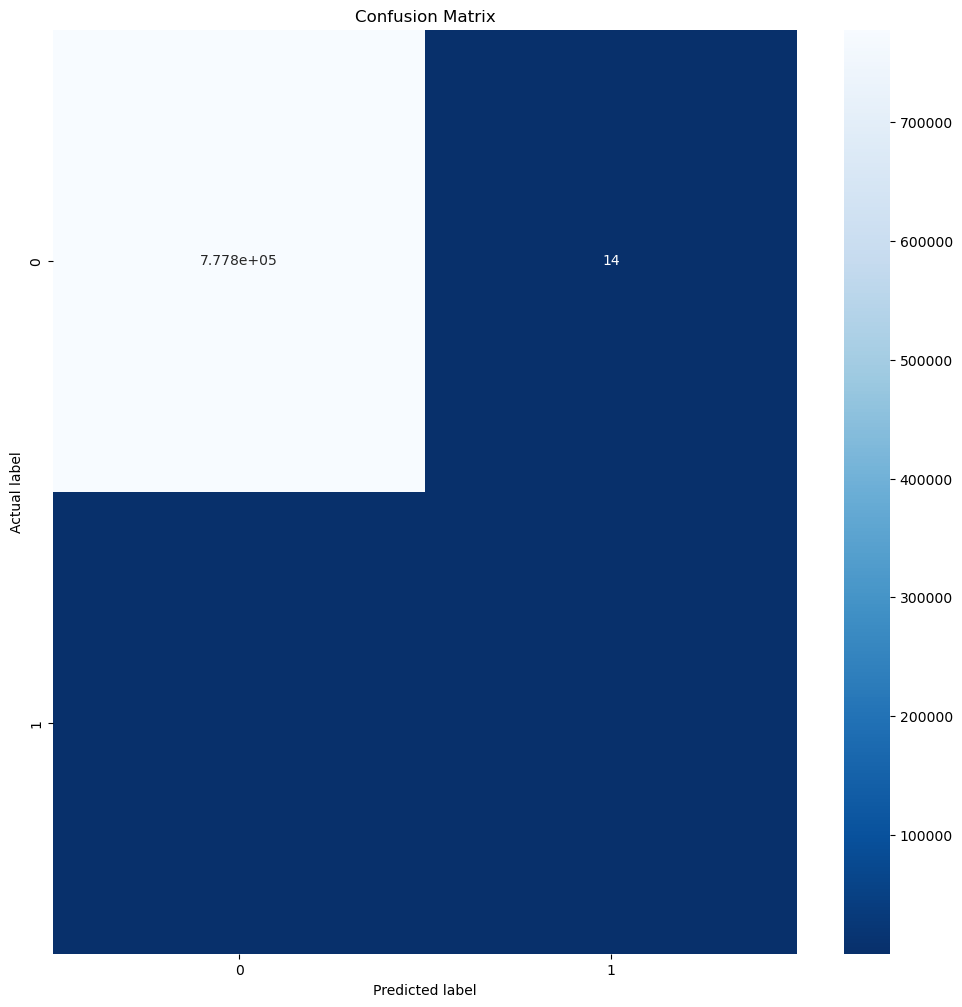

XGBoost - Classification Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00    777784
        True       0.97      0.95      0.96       435

    accuracy                           1.00    778219
   macro avg       0.98      0.97      0.98    778219
weighted avg       1.00      1.00      1.00    778219



In [21]:
# Split data into cheaters and non-cheaters
cheaters_data = pubg_data[pubg_data['potential_cheaters']]
pubg_data = pubg_data[~pubg_data['potential_cheaters']]

# Combine cheaters and non-cheaters
pubg_data = pd.concat([pubg_data, cheaters_data])

# Drop target variable from features
pubg_data = pubg_data.drop('winPlacePerc', axis=1)

# Prepare features and target variable
X = pubg_data.drop('potential_cheaters', axis=1)
y = pubg_data['potential_cheaters']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print("XGBoost - Test Data Accuracy: ", accuracy)
print("XGBoost - Precision Score: ", precision)
print("XGBoost - Recall Score: ", recall)
print("XGBoost - F1 Score: ", f1)
print("XGBoost - Area Under Curve (AUC): ", roc_auc)

# Confusion Matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, cmap='Blues_r', fmt='0.4g')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("XGBoost - Classification Report:\n", classification_report(y_test, y_pred))